In [2]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict
from utils.distribution import pol_to_alpha
import numpy as np
def ALPHAS(Np):
    return pol_to_alpha(np.linspace(1/Np/2, 1-1/Np/2, Np)/4)

import jax.numpy as jnp
from sweeps import (
    run_sus_pol_sweep_SIRB,
    run_pol_mean_sweep_SIRB)
from utils.debug_tools import visualize_parameter_mesh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from models.variable_susceptibility import simulate_variable_susceptibility_hom_final

In [43]:
import matplotlib.pyplot as plt

In [41]:
params = {
    'transmission_rates': (0.0, 0.6),  # (min, max) susceptibility
    'recovery_rate': 0.1,
    'dt': 0.25,
    'homophilic_tendency': 2.0,  # Only used for homophilic case
    'beta_params': (0.5, 0.5)    # Beta distribution parameters
}

# Run for 1000 steps
n_steps = int(1000 / params['dt'])

In [42]:
NH = 50
RES_test = np.zeros(NH)

hh = np.linspace(-10, 10, NH)

for i, h in enumerate(hh):
    params['homophilic_tendency'] = h
    # For homophilic mixing:
    final_state, r0, obs_h = simulate_variable_susceptibility_hom_final(
        beta_params=params['beta_params'],
        params=params,
        n_steps=n_steps
    )

    # final_state is a tuple of (S, I, R) arrays with final values
    S_final, I_final, R_final = final_state

    RES_test[i] = np.sum(I_final+R_final)

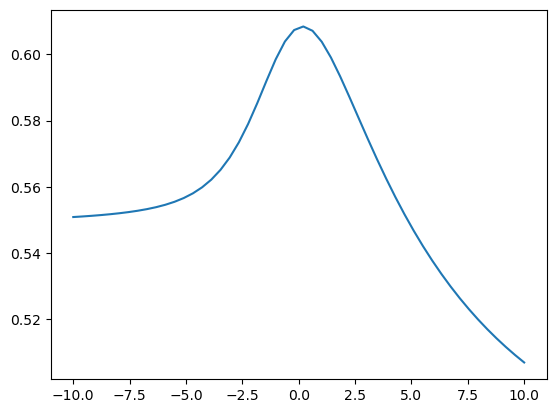

In [44]:
fig, ax = plt.subplots()

ax.plot(hh, RES_test)

In [3]:
%load_ext autoreload
%autoreload 2

import jax
import jax.numpy as jnp
from typing import Tuple, Dict
from core import (
    create_contact_matrix,
    create_ngm,
    StateType
)
from models import (
    simulate_variable_susceptibility_hom_trajectory,
    generate_susceptibility,
    N_COMPARTMENTS
)
from debug_tools import test_C_ngm_trajectory_simulation, plot_C_ngm_trajectory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


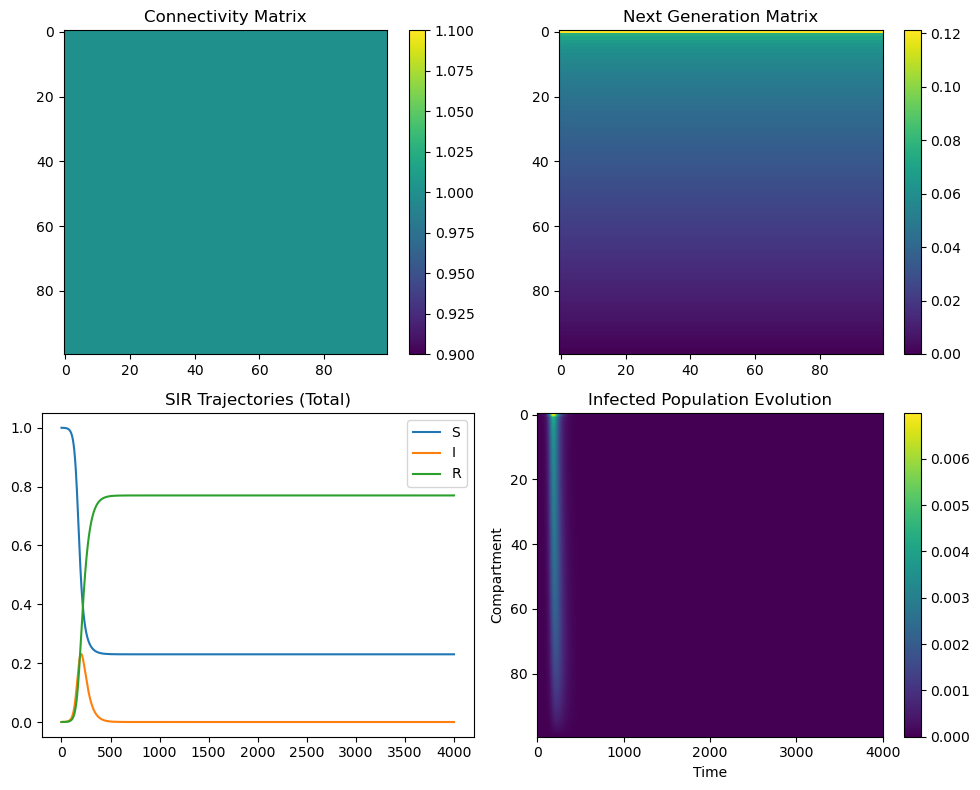

In [11]:
C, ngm, trajectories = test_C_ngm_trajectory_simulation(
    susceptibility=0.6,  # Maximum susceptibility
    h=0,              # Homophilic tendency
    a=0.9,              # First beta parameter
    b=0.9               # Second beta parameter
)

# Plot results
fig = plot_C_ngm_trajectory(C, ngm, trajectories)

In [9]:
# calculate the maximum eigenvalue of NGM

eigvals = jnp.linalg.eigvals(ngm)
max_eig = jnp.max(eigvals)
print(f'Maximum eigenvalue of NGM: {max_eig:.4f}')

Maximum eigenvalue of NGM: 3.2912+0.0000j
